In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [2]:
df=pd.read_csv("Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# Data Report

In [3]:
print(f"Data has {df.shape[0]} rows and{df.shape[1]} columns")

Data has 209593 rows and37 columns


In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
numCol=[]
catCol=[]

for col in df.columns:
    if df[col].dtype=='O':
        catCol.append(col)
    else:
            numCol.append(col)

In [7]:
print("List of numerical columns:",numCol)
print("List of categorical columns:",catCol)

List of numerical columns: ['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
List of categorical columns: ['msisdn', 'pcircle', 'pdate']


# Missing Value Analysis of Dataset

In [8]:
df.isna().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0              0.0
label                   0.0
msisdn                  0.0
aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
cnt_loans90             0.0
amnt_loans90            0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
payback30               0.0
payback90               0.0
pcircle             

In [10]:
df[df.isna().sum(axis=1)>1]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate


# Check Duplicate,Repeated and Unknown values

In [11]:
df[df.duplicated()]

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate


In [12]:
df.describe(include="all")

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,NaN,04581I85330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,104797.000000,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,60504.431823,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,1.000000,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,52399.000000,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,104797.000000,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,157195.000000,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


In [13]:
df[numCol].describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


# Univariate Analysis

In [14]:
for i in numCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

Unnamed: 0
209593
2049      1
23969     1
126359    1
103832    1
105881    1
         ..
57929     1
64074     1
62027     1
51788     1
2047      1
Name: Unnamed: 0, Length: 209593, dtype: int64


label
2
1    183431
0     26162
Name: label, dtype: int64


aon
4507
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
818222.402828      1
603666.669107      1
852238.900959      1
851325.512514      1
913930.093986      1
Name: aon, Length: 4507, dtype: int64


daily_decr30
147025
0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
10831.550000       1
4908.100000        1
9460.015000        1
25.510333          1
8025.668000        1
Name: daily_decr30, Length: 147025, dtype: int64


daily_decr90
158669
0.000000        4063
500.000000       781
1000.000000      490
700.000000       343
600.000000       316
                ... 
62.055667    

1363
0.000000      106712
2.000000        5601
3.000000        5023
4.000000        3931
2.500000        3518
               ...  
13.714286          1
24.444444          1
63.200000          1
121.000000         1
90.666667          1
Name: payback30, Length: 1363, dtype: int64


payback90
2381
0.000000     95699
2.000000      4982
3.000000      4437
4.000000      3610
2.500000      3015
             ...  
3.640000         1
3.043478         1
28.777778        1
47.750000        1
2.480000         1
Name: payback90, Length: 2381, dtype: int64




Unnamed: 0


<Figure size 432x288 with 0 Axes>

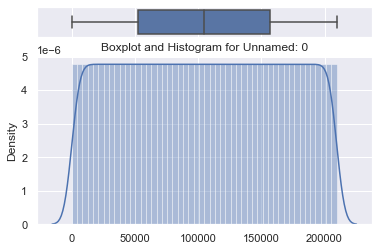

label


<Figure size 432x288 with 0 Axes>

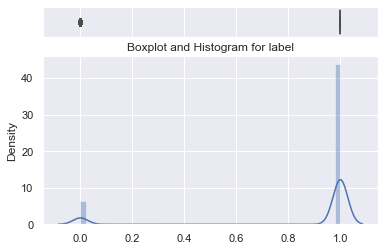

aon


<Figure size 432x288 with 0 Axes>

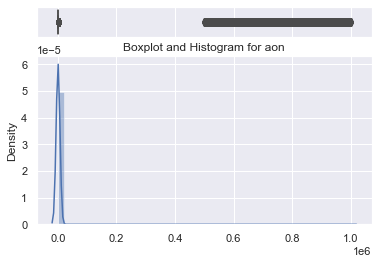

daily_decr30


<Figure size 432x288 with 0 Axes>

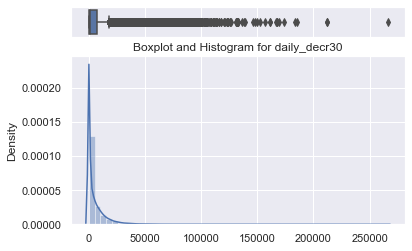

daily_decr90


<Figure size 432x288 with 0 Axes>

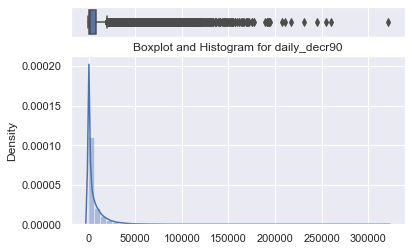

rental30


<Figure size 432x288 with 0 Axes>

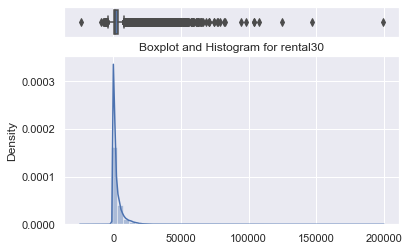

rental90


<Figure size 432x288 with 0 Axes>

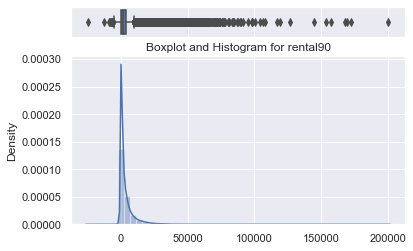

last_rech_date_ma


<Figure size 432x288 with 0 Axes>

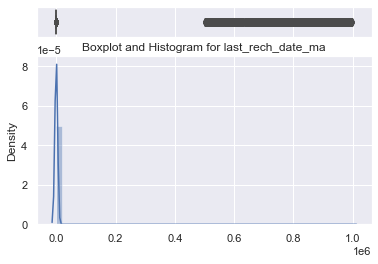

last_rech_date_da


<Figure size 432x288 with 0 Axes>

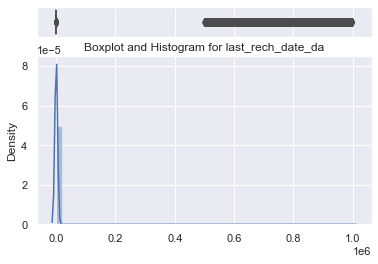

last_rech_amt_ma


<Figure size 432x288 with 0 Axes>

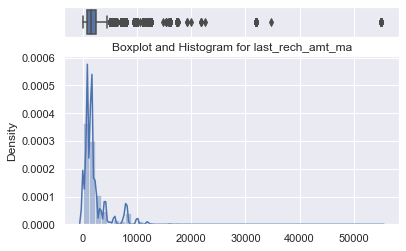

cnt_ma_rech30


<Figure size 432x288 with 0 Axes>

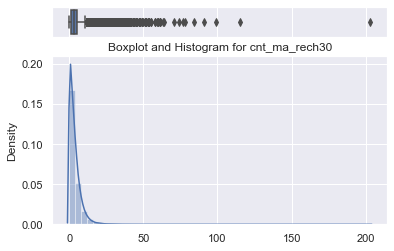

fr_ma_rech30


<Figure size 432x288 with 0 Axes>

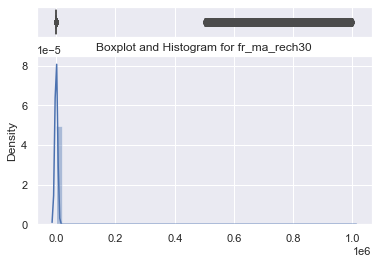

sumamnt_ma_rech30


<Figure size 432x288 with 0 Axes>

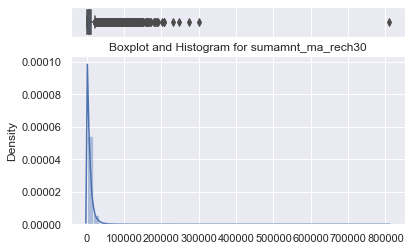

medianamnt_ma_rech30


<Figure size 432x288 with 0 Axes>

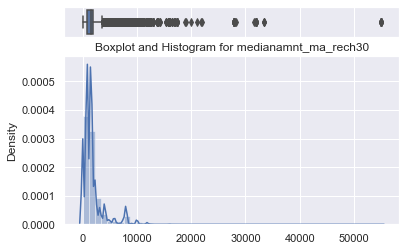

medianmarechprebal30


<Figure size 432x288 with 0 Axes>

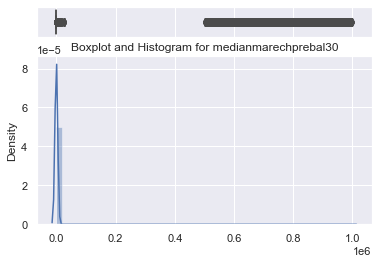

cnt_ma_rech90


<Figure size 432x288 with 0 Axes>

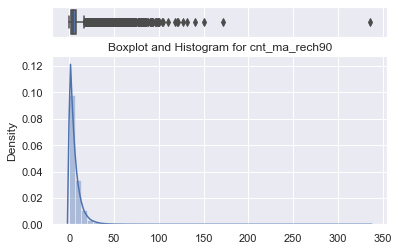

fr_ma_rech90


<Figure size 432x288 with 0 Axes>

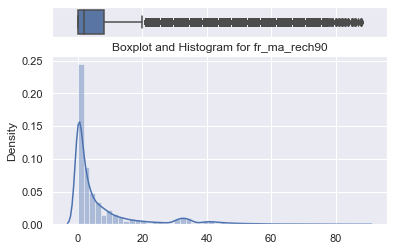

sumamnt_ma_rech90


<Figure size 432x288 with 0 Axes>

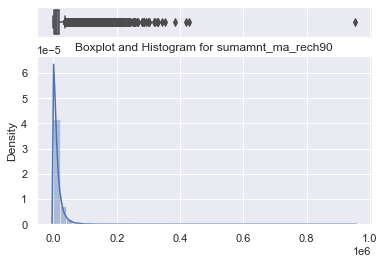

medianamnt_ma_rech90


<Figure size 432x288 with 0 Axes>

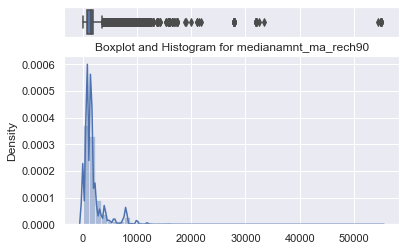

medianmarechprebal90


<Figure size 432x288 with 0 Axes>

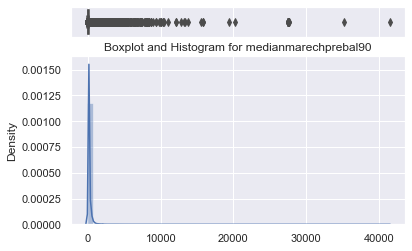

cnt_da_rech30


<Figure size 432x288 with 0 Axes>

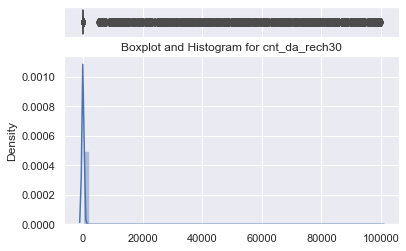

fr_da_rech30


<Figure size 432x288 with 0 Axes>

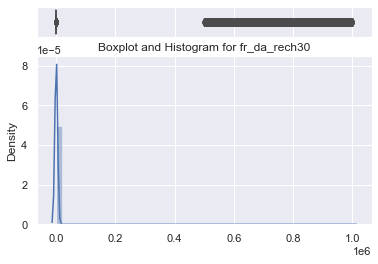

cnt_da_rech90


<Figure size 432x288 with 0 Axes>

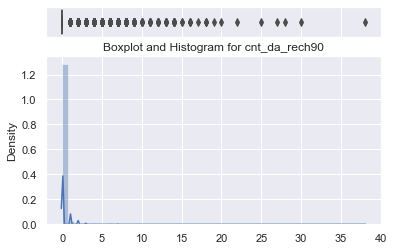

fr_da_rech90


<Figure size 432x288 with 0 Axes>

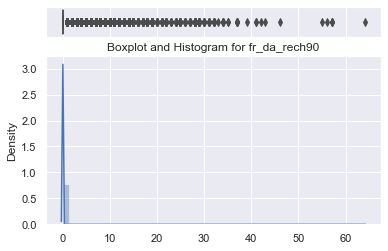

cnt_loans30


<Figure size 432x288 with 0 Axes>

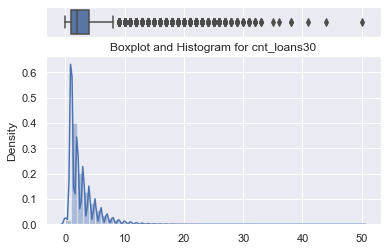

amnt_loans30


<Figure size 432x288 with 0 Axes>

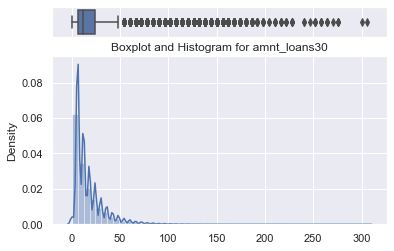

maxamnt_loans30


<Figure size 432x288 with 0 Axes>

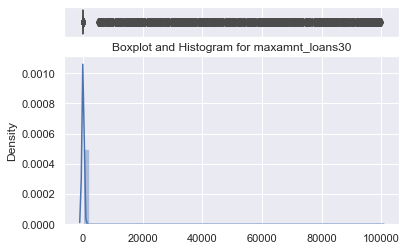

medianamnt_loans30


<Figure size 432x288 with 0 Axes>

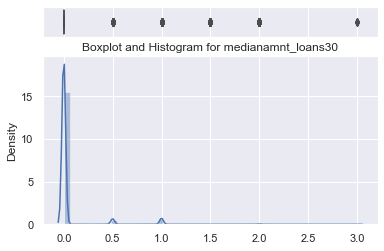

cnt_loans90


<Figure size 432x288 with 0 Axes>

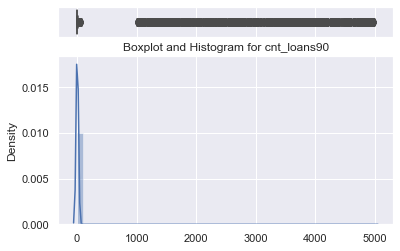

amnt_loans90


<Figure size 432x288 with 0 Axes>

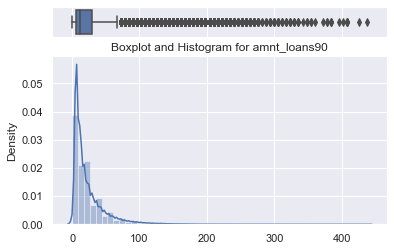

maxamnt_loans90


<Figure size 432x288 with 0 Axes>

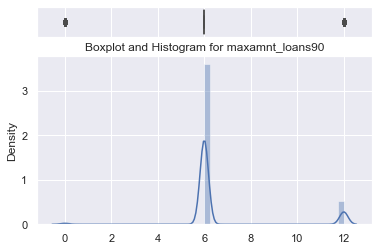

medianamnt_loans90


<Figure size 432x288 with 0 Axes>

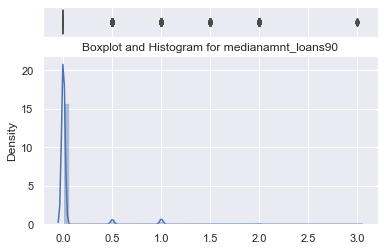

payback30


<Figure size 432x288 with 0 Axes>

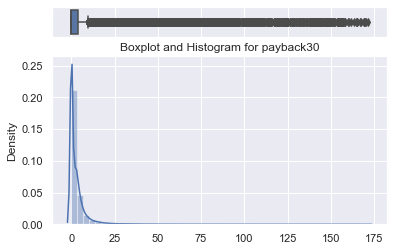

payback90


<Figure size 432x288 with 0 Axes>

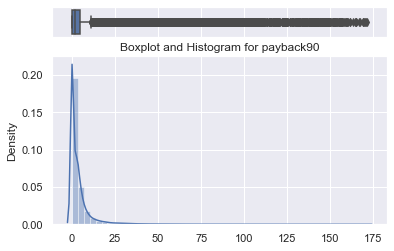

In [15]:
for i in numCol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x = df[i],ax=ax_box)
    #sns.histplot (data=df, x=i, ax=ax_hist)
    sns.distplot(x= df[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Boxplot and Histogram for {i}")
    plt.show()

# Data Scaling

In [16]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [17]:
df_num=pd.DataFrame(imp_median.fit_transform(df[numCol]), columns=numCol)

In [18]:
df=pd.concat([df_num],axis=1)

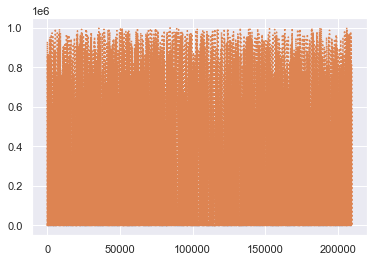

In [19]:
plt.plot(df["Unnamed: 0"],df["label"],label="Line1",linestyle="-.")
plt.plot(df["Unnamed: 0"],df["aon"],label="Line2",linestyle=":")
plt.plot();

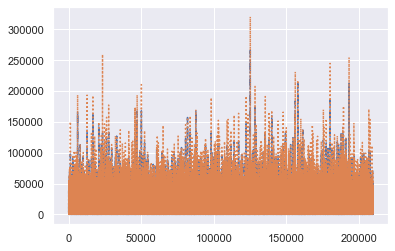

In [20]:
plt.plot(df["Unnamed: 0"],df["daily_decr30"],label="Line1",linestyle="-.")
plt.plot(df["Unnamed: 0"],df["daily_decr90"],label="Line2",linestyle=":")
plt.plot();

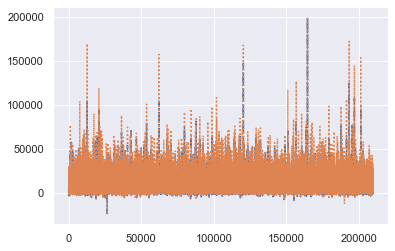

In [21]:
plt.plot(df["Unnamed: 0"],df["rental30"],label="Line1",linestyle="-.")
plt.plot(df["Unnamed: 0"],df["rental90"],label="Line2",linestyle=":")
plt.plot();

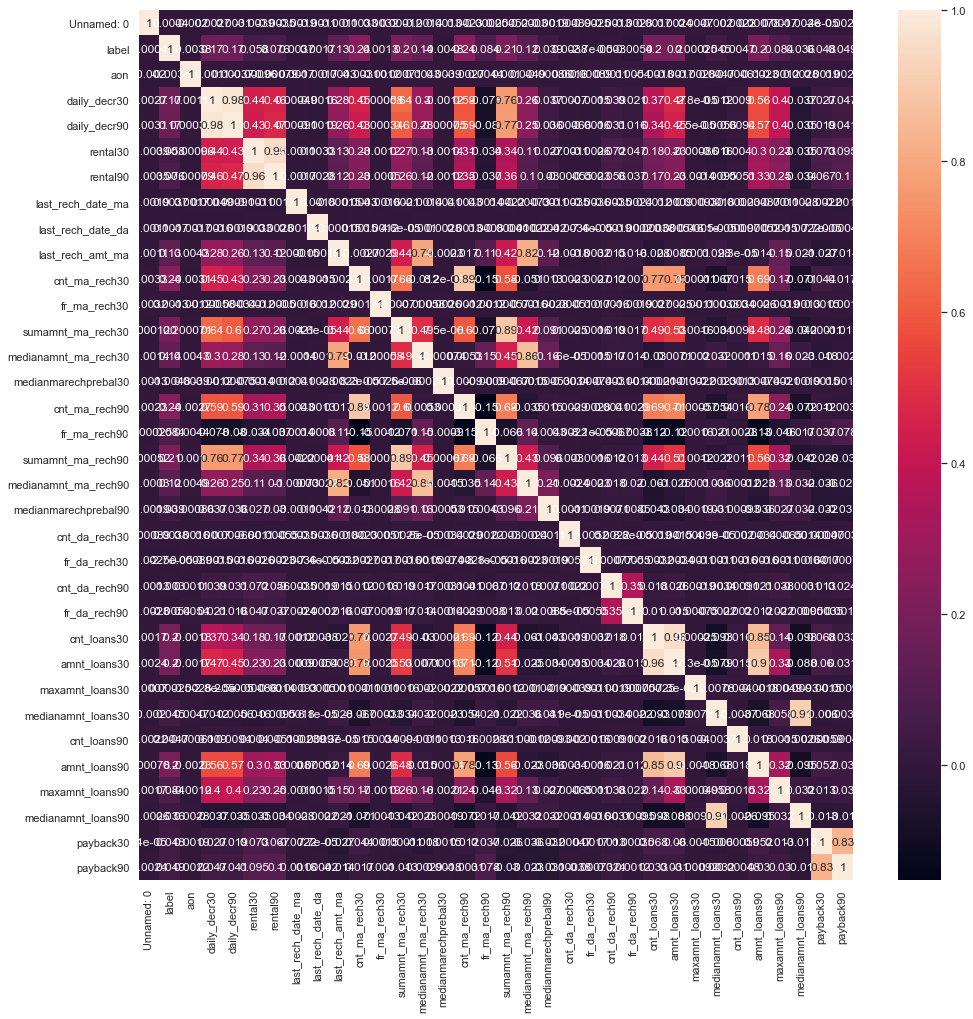

In [22]:
plt.figure(figsize= (16,16))
sns.heatmap(df.corr(),annot=True)
plt.show()

# MinMax Sacaling/ Normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler
MinMaxscaler=MinMaxScaler()
MinMax=MinMaxscaler.fit_transform(df[numCol])
print(MinMax)

[[0.00000000e+00 0.00000000e+00 3.20029201e-04 ... 0.00000000e+00
  1.69096210e-01 1.69096210e-01]
 [4.77117447e-06 1.00000000e+00 7.60069352e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.54234894e-06 1.00000000e+00 5.83053201e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [9.99990458e-01 1.00000000e+00 1.06109682e-03 ... 0.00000000e+00
  2.33236152e-02 2.23517979e-02]
 [9.99995229e-01 1.00000000e+00 1.78016243e-03 ... 0.00000000e+00
  0.00000000e+00 6.12244898e-02]
 [1.00000000e+00 1.00000000e+00 1.62914865e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [24]:
df[numCol]

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1.0,0.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,29.000000,29.000000
1,2.0,1.0,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787.0,...,1.0,12.0,12.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000
2,3.0,1.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,...,1.0,6.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000
3,4.0,1.0,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000
4,5.0,1.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,...,7.0,42.0,6.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589.0,1.0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,1.000000,1.000000
209589,209590.0,1.0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773.0,...,3.0,18.0,6.0,0.0,3.0,18.0,6.0,0.0,1.000000,1.000000
209590,209591.0,1.0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539.0,...,4.0,42.0,12.0,0.0,6.0,54.0,12.0,0.0,4.000000,3.833333
209591,209592.0,1.0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773.0,...,2.0,18.0,12.0,0.0,3.0,24.0,12.0,0.0,0.000000,10.500000


In [25]:
minMaxDF=pd.DataFrame(MinMax,columns=numCol)
minMaxDF

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.000000,0.0,0.000320,0.011834,0.009847,0.107594,0.111090,0.000031,0.000029,0.027982,...,0.04,0.039216,0.00006,0.0,0.000400,0.027397,0.5,0.0,0.169096,0.169096
1,0.000005,1.0,0.000760,0.045918,0.038094,0.123183,0.126349,0.000049,0.000029,0.105218,...,0.02,0.039216,0.00012,0.0,0.000200,0.027397,1.0,0.0,0.000000,0.000000
2,0.000010,1.0,0.000583,0.005605,0.004649,0.110648,0.113936,0.000032,0.000029,0.027982,...,0.02,0.019608,0.00006,0.0,0.000200,0.013699,0.5,0.0,0.000000,0.000000
3,0.000014,1.0,0.000289,0.000429,0.000356,0.107322,0.110642,0.000070,0.000029,0.017218,...,0.04,0.039216,0.00006,0.0,0.000400,0.027397,0.5,0.0,0.000000,0.000000
4,0.000019,1.0,0.000995,0.000916,0.000760,0.111541,0.114820,0.000033,0.000029,0.041982,...,0.14,0.137255,0.00006,0.0,0.001401,0.095890,0.5,0.0,0.013605,0.013605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.999981,1.0,0.000452,0.000921,0.000764,0.111497,0.114777,0.000030,0.000029,0.073600,...,0.04,0.039216,0.00006,0.0,0.000400,0.027397,0.5,0.0,0.005831,0.005831
209589,0.999986,1.0,0.001123,0.000488,0.000405,0.114368,0.117619,0.000033,0.000029,0.014055,...,0.06,0.058824,0.00006,0.0,0.000600,0.041096,0.5,0.0,0.005831,0.005831
209590,0.999990,1.0,0.001061,0.044869,0.037407,0.132932,0.149482,0.000032,0.000029,0.027982,...,0.08,0.137255,0.00012,0.0,0.001201,0.123288,1.0,0.0,0.023324,0.022352
209591,0.999995,1.0,0.001780,0.047295,0.039496,0.108455,0.114312,0.000031,0.000067,0.014055,...,0.04,0.058824,0.00012,0.0,0.000600,0.054795,1.0,0.0,0.000000,0.061224


In [26]:
minMaxDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,0.500000,0.288677,0.0,0.250000,0.500000,0.750000,1.0
label,209593.0,0.875177,0.330519,0.0,1.000000,1.000000,1.000000,1.0
aon,209593.0,0.008161,0.075703,0.0,0.000294,0.000575,0.001030,1.0
daily_decr30,209593.0,0.020579,0.034662,0.0,0.000509,0.005872,0.027581,1.0
daily_decr90,209593.0,0.019255,0.034044,0.0,0.000423,0.004967,0.024619,1.0
rental30,209593.0,0.118698,0.019350,0.0,0.107865,0.111472,0.121682,1.0
rental90,209593.0,0.125424,0.025661,0.0,0.111269,0.115866,0.128619,1.0
last_rech_date_ma,209593.0,0.003790,0.053977,0.0,0.000030,0.000032,0.000036,1.0
last_rech_date_da,209593.0,0.003744,0.053418,0.0,0.000029,0.000029,0.000029,1.0
last_rech_amt_ma,209593.0,0.037536,0.043105,0.0,0.014000,0.027982,0.041982,1.0


In [27]:
df[numCol].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


# Standardization

In [28]:
from sklearn.preprocessing import StandardScaler
stdscaler=StandardScaler()
stdscaled=stdscaler.fit_transform(df[numCol])
print(stdscaled)

[[-1.73204254 -2.64789583 -0.10357685 ... -0.22959366  2.9046997
   2.39409346]
 [-1.73202602  0.37765836 -0.09776412 ... -0.22959366 -0.38562959
  -0.41923266]
 [-1.73200949  0.37765836 -0.10010243 ... -0.22959366 -0.38562959
  -0.41923266]
 ...
 [ 1.73200949  0.37765836 -0.09378769 ... -0.22959366  0.06820893
  -0.04735622]
 [ 1.73202602  0.37765836 -0.08428915 ... -0.22959366 -0.38562959
   0.59938541]
 [ 1.73204254  0.37765836 -0.08628398 ... -0.22959366 -0.38562959
  -0.41923266]]


In [29]:
stdscaledDF= pd.DataFrame(stdscaled,columns=numCol)
stdscaledDF

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-1.732043,-2.647896,-0.103577,-0.252299,-0.276346,-0.573844,-0.558583,-0.069637,-0.069550,-0.221637,...,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,2.904700,2.394093
1,-1.732026,0.377658,-0.097764,0.731037,0.553380,0.231788,0.036020,-0.069303,-0.069550,1.570178,...,-0.688582,-0.342470,-0.061871,-0.247794,-0.077941,-0.439950,2.517690,-0.229594,-0.385630,-0.419233
2,-1.732009,0.377658,-0.100102,-0.432011,-0.429033,-0.416020,-0.447674,-0.069619,-0.069550,-0.221637,...,-0.688582,-0.687700,-0.063284,-0.247794,-0.077941,-0.666624,-0.334212,-0.229594,-0.385630,-0.419233
3,-1.731993,0.377658,-0.103986,-0.581326,-0.555125,-0.587935,-0.576036,-0.068914,-0.069550,-0.471344,...,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,-0.385630,-0.419233
4,-1.731976,0.377658,-0.094660,-0.567293,-0.543274,-0.369886,-0.413227,-0.069600,-0.069550,0.103151,...,1.660218,1.383682,-0.063284,-0.247794,-0.051250,0.693417,-0.334212,-0.229594,-0.120890,-0.192873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1.731976,0.377658,-0.101833,-0.567157,-0.543159,-0.372140,-0.414910,-0.069656,-0.069550,0.836664,...,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,-0.272170,-0.322221
209589,1.731993,0.377658,-0.092969,-0.579622,-0.553686,-0.223791,-0.304144,-0.069600,-0.069550,-0.544737,...,0.094351,0.002761,-0.063284,-0.247794,-0.069044,-0.213277,-0.334212,-0.229594,-0.272170,-0.322221
209590,1.732009,0.377658,-0.093788,0.700790,0.533194,0.735567,0.937500,-0.069619,-0.069550,-0.221637,...,0.485818,1.383682,-0.061871,-0.247794,-0.055699,1.146764,2.517690,-0.229594,0.068209,-0.047356
209591,1.732026,0.377658,-0.084289,0.770755,0.594558,-0.529352,-0.433039,-0.069637,-0.068838,-0.544737,...,-0.297116,0.002761,-0.061871,-0.247794,-0.069044,0.013396,2.517690,-0.229594,-0.385630,0.599385


In [30]:
df[numCol]

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1.0,0.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,29.000000,29.000000
1,2.0,1.0,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787.0,...,1.0,12.0,12.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000
2,3.0,1.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,...,1.0,6.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000
3,4.0,1.0,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000
4,5.0,1.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,...,7.0,42.0,6.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589.0,1.0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,1.000000,1.000000
209589,209590.0,1.0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773.0,...,3.0,18.0,6.0,0.0,3.0,18.0,6.0,0.0,1.000000,1.000000
209590,209591.0,1.0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539.0,...,4.0,42.0,12.0,0.0,6.0,54.0,12.0,0.0,4.000000,3.833333
209591,209592.0,1.0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773.0,...,2.0,18.0,12.0,0.0,3.0,24.0,12.0,0.0,0.000000,10.500000


In [31]:
stdscaledDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,-2.755521e-17,1.000002,-1.732043,-0.866021,0.000000,0.866021,1.732043
label,209593.0,1.806183e-15,1.000002,-2.647896,0.377658,0.377658,0.377658,0.377658
aon,209593.0,-1.247069e-17,1.000002,-0.107804,-0.103920,-0.100208,-0.094197,13.101745
daily_decr30,209593.0,-2.204011e-16,1.000002,-0.593716,-0.579025,-0.424292,0.202004,28.256790
daily_decr90,209593.0,2.978262e-19,1.000002,-0.565587,-0.553159,-0.419691,0.157552,28.807915
rental30,209593.0,-3.398164e-16,1.000002,-6.134212,-0.559851,-0.373444,0.154194,45.544863
rental90,209593.0,2.411532e-17,1.000002,-4.887660,-0.551629,-0.372485,0.124494,34.081361
last_rech_date_ma,209593.0,-2.449357e-16,1.000002,-0.070212,-0.069656,-0.069619,-0.069544,18.456181
last_rech_date_da,209593.0,-4.180683e-15,1.000002,-0.070093,-0.069550,-0.069550,-0.069550,18.650400
last_rech_amt_ma,209593.0,6.270109e-16,1.000002,-0.870790,-0.546003,-0.221637,0.103151,22.328322


# Missing Value Analysis

In [32]:
df.isna().sum()

Unnamed: 0              0
label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [33]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0              0.0
label                   0.0
aon                     0.0
daily_decr30            0.0
daily_decr90            0.0
rental30                0.0
rental90                0.0
last_rech_date_ma       0.0
last_rech_date_da       0.0
last_rech_amt_ma        0.0
cnt_ma_rech30           0.0
fr_ma_rech30            0.0
sumamnt_ma_rech30       0.0
medianamnt_ma_rech30    0.0
medianmarechprebal30    0.0
cnt_ma_rech90           0.0
fr_ma_rech90            0.0
sumamnt_ma_rech90       0.0
medianamnt_ma_rech90    0.0
medianmarechprebal90    0.0
cnt_da_rech30           0.0
fr_da_rech30            0.0
cnt_da_rech90           0.0
fr_da_rech90            0.0
cnt_loans30             0.0
amnt_loans30            0.0
maxamnt_loans30         0.0
medianamnt_loans30      0.0
cnt_loans90             0.0
amnt_loans90            0.0
maxamnt_loans90         0.0
medianamnt_loans90      0.0
payback30               0.0
payback90               0.0
dtype: float64

In [34]:
df[df.isna().sum(axis=1)>1]

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90


In [35]:
df[df.isna().sum(axis=1)>1].shape

(0, 34)

<AxesSubplot:>

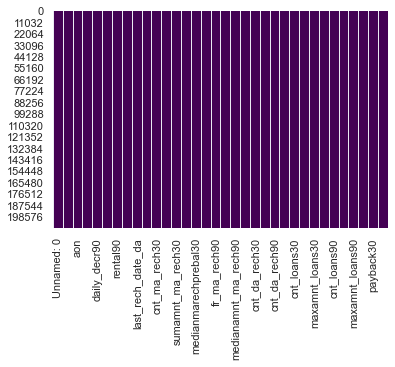

In [36]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Outlier Analysis

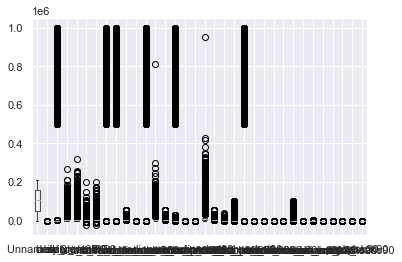

In [37]:
df.boxplot();

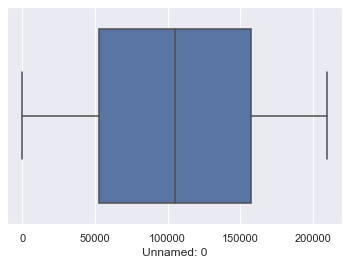

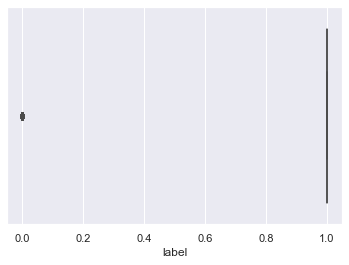

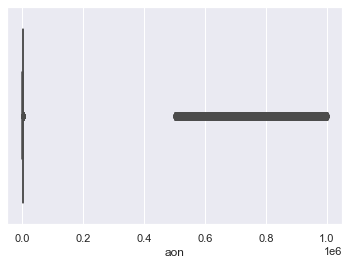

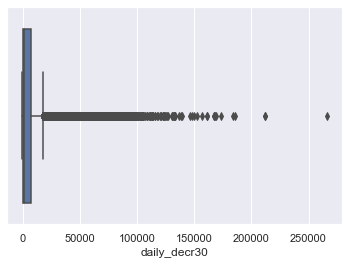

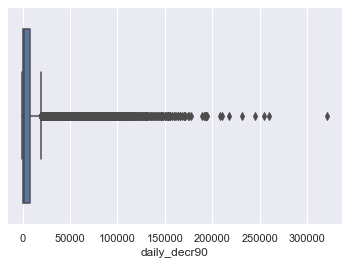

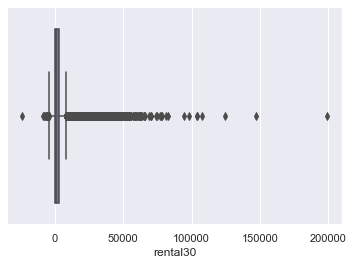

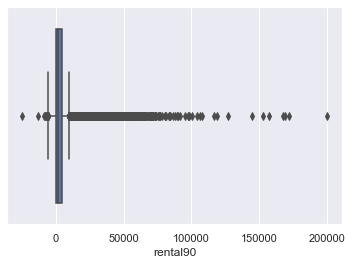

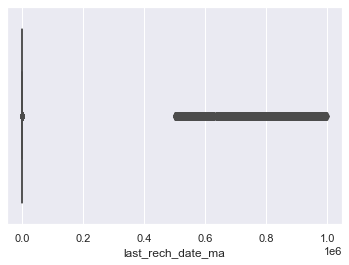

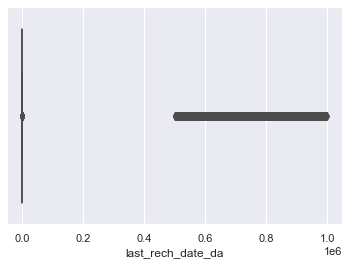

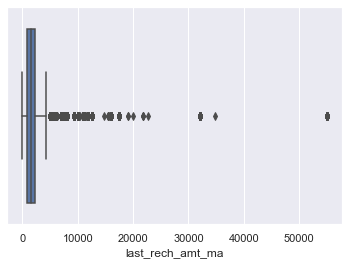

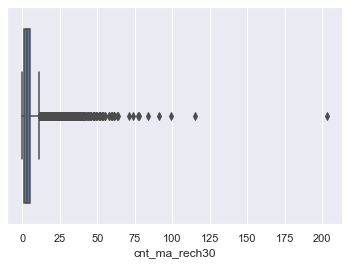

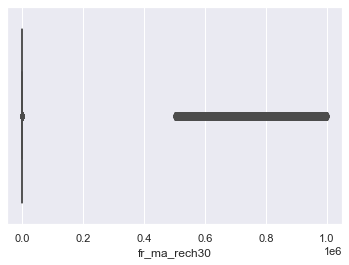

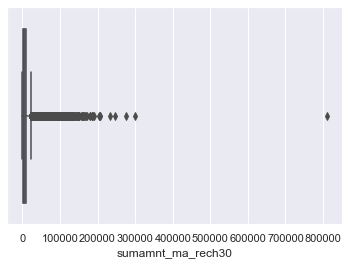

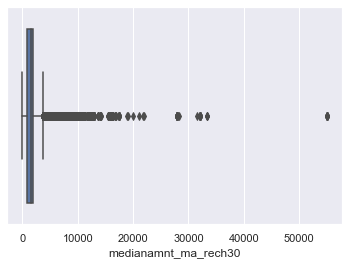

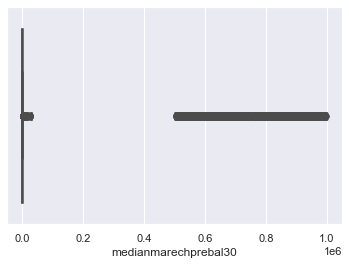

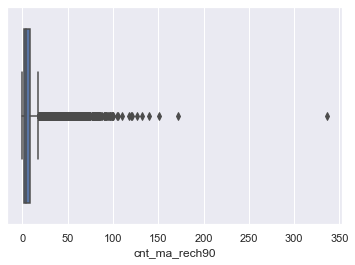

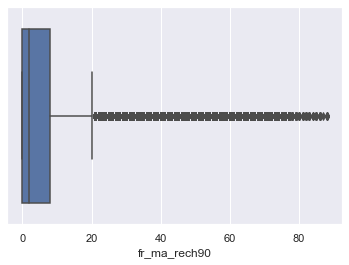

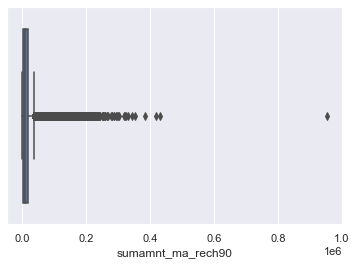

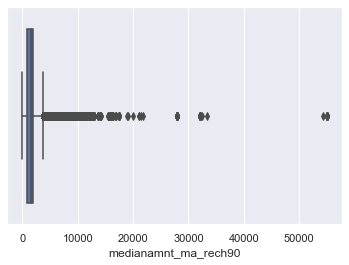

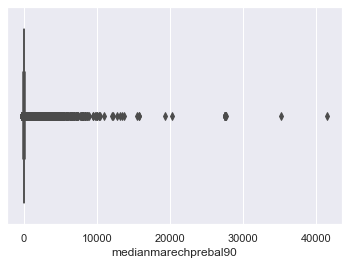

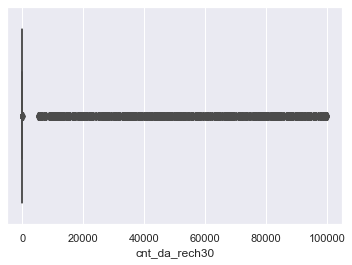

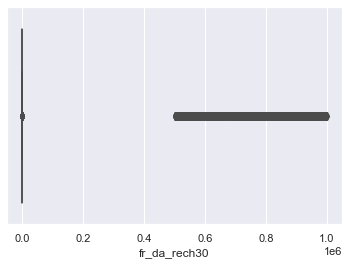

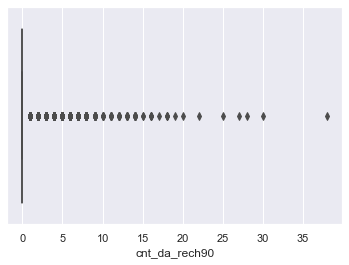

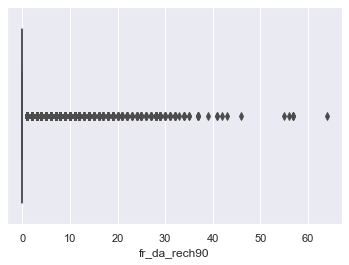

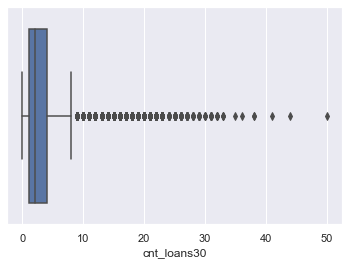

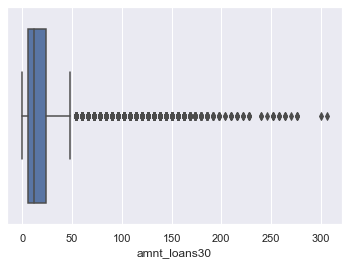

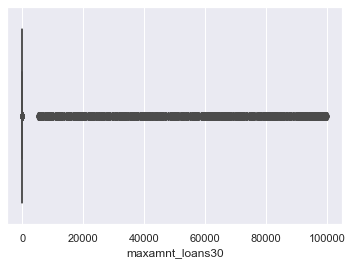

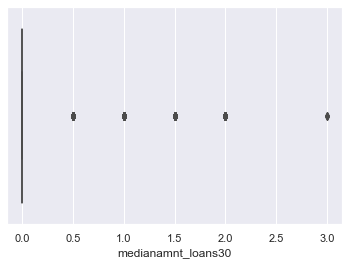

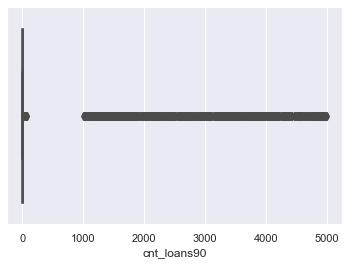

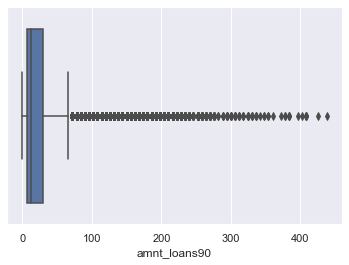

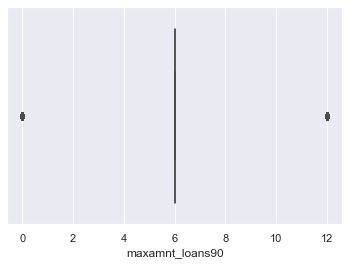

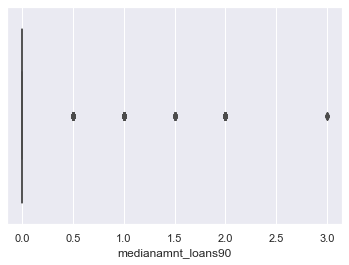

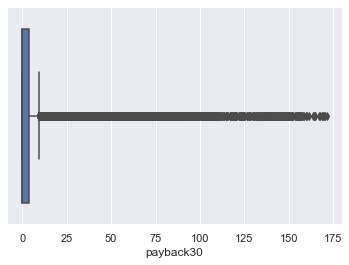

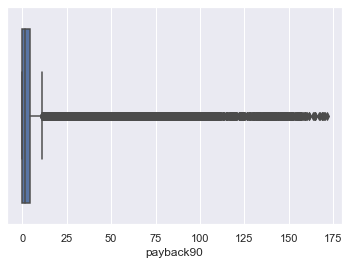

In [38]:
for i in numCol:
    plt.figure()
    sns.boxplot(x=df[i])

In [39]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(((df<(Q1-1.5 * IQR)) | (df > (Q3 +1.5 * IQR ))).sum())

Unnamed: 0                  0
label                   26162
aon                      3607
daily_decr30            16350
daily_decr90            18187
rental30                18526
rental90                19399
last_rech_date_ma       20145
last_rech_date_da        6732
last_rech_amt_ma        20864
cnt_ma_rech30           11294
fr_ma_rech30            11450
sumamnt_ma_rech30       13219
medianamnt_ma_rech30    24928
medianmarechprebal30    27252
cnt_ma_rech90           14155
fr_ma_rech90            26845
sumamnt_ma_rech90       13954
medianamnt_ma_rech90    25457
medianmarechprebal90    25933
cnt_da_rech30            4114
fr_da_rech30             1579
cnt_da_rech90            5367
fr_da_rech90              865
cnt_loans30              7817
amnt_loans30            10416
maxamnt_loans30         30400
medianamnt_loans30      14148
cnt_loans90             11523
amnt_loans90            12590
maxamnt_loans90         28648
medianamnt_loans90      12169
payback30               16532
payback90 

In [40]:
outNum =[]
for i in numCol:
    q1= df[i].quantile(0.25)
    q3= df[i].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    outNum.append([i,q1,q3,iqr,lower_limit,upper_limit])
    
    df[i] = np.where(df[i]> upper_limit,upper_limit,
                 np.where(df[i]< lower_limit,lower_limit,
                         df[i]))

In [41]:
pd.DataFrame(outNum,columns=["variableName","Q1","Q3","IQR","lowe_limit","upper_limit"])

,variableName,Q1,Q3,IQR,lowe_limit,upper_limit
0,Unnamed: 0,52399.000,157195.00,104796.000,-104795.000,314389.000
1,label,1.000,1.00,0.000,1.000,1.000
2,aon,246.000,982.00,736.000,-858.000,2086.000
3,daily_decr30,42.440,7244.00,7201.560,-10759.900,18046.340
4,daily_decr90,42.692,7802.79,7760.098,-11597.455,19442.937
5,rental30,280.420,3356.94,3076.520,-4334.360,7971.720
6,rental90,300.260,4201.79,3901.530,-5552.035,10054.085
7,last_rech_date_ma,1.000,7.00,6.000,-8.000,16.000
8,last_rech_date_da,0.000,0.00,0.000,0.000,0.000
9,last_rech_amt_ma,770.000,2309.00,1539.000,-1538.500,4617.500


# Heatmap of Dataset

<AxesSubplot:>

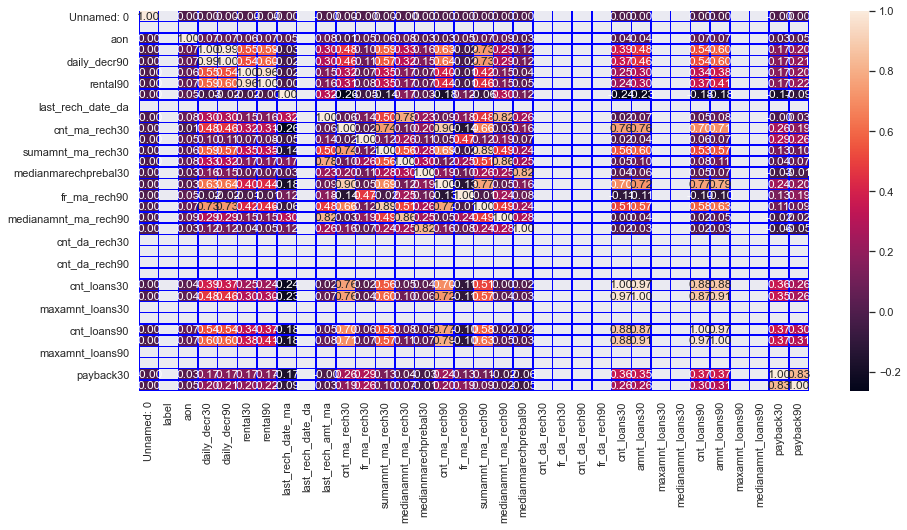

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="blue", fmt='.2f')

In [43]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,...,209593.000000,209593.000000,209593.0,209593.0,209593.000000,209593.000000,209593.0,209593.0,209593.000000,209593.000000
mean,104797.000000,1.0,668.405825,4468.105346,4855.261718,2197.069184,2769.147968,4.837991,0.0,1719.109131,...,2.641856,16.862223,6.0,0.0,3.448989,21.423320,6.0,0.0,2.299777,2.894150
std,60504.431823,0.0,514.130937,5859.401770,6438.219389,2552.708718,3251.352605,5.071356,0.0,1345.846661,...,2.089075,13.238181,0.0,0.0,3.025185,18.506542,0.0,0.0,3.030659,3.632511
min,1.000000,1.0,-48.000000,-93.012667,-93.012667,-4334.360000,-5552.035000,-8.000000,0.0,0.000000,...,0.000000,0.000000,6.0,0.0,0.000000,0.000000,6.0,0.0,0.000000,0.000000
25%,52399.000000,1.0,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.0,770.000000,...,1.000000,6.000000,6.0,0.0,1.000000,6.000000,6.0,0.0,0.000000,0.000000
50%,104797.000000,1.0,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.0,1539.000000,...,2.000000,12.000000,6.0,0.0,2.000000,12.000000,6.0,0.0,0.000000,1.666667
75%,157195.000000,1.0,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.0,2309.000000,...,4.000000,24.000000,6.0,0.0,5.000000,30.000000,6.0,0.0,3.750000,4.500000
max,209593.000000,1.0,2086.000000,18046.340000,19442.937000,7971.720000,10054.085000,16.000000,0.0,4617.500000,...,8.500000,51.000000,6.0,0.0,11.000000,66.000000,6.0,0.0,9.375000,11.250000


In [44]:
df.skew()

Unnamed: 0              0.000000
label                   0.000000
aon                     0.947127
daily_decr30            1.239231
daily_decr90            1.238995
rental30                1.192510
rental90                1.193291
last_rech_date_ma       1.040301
last_rech_date_da       0.000000
last_rech_amt_ma        1.003446
cnt_ma_rech30           0.904157
fr_ma_rech30            1.253282
sumamnt_ma_rech30       1.080771
medianamnt_ma_rech30    0.728219
medianmarechprebal30    0.988628
cnt_ma_rech90           0.934789
fr_ma_rech90            1.172479
sumamnt_ma_rech90       1.126421
medianamnt_ma_rech90    0.763904
medianmarechprebal90    0.957933
cnt_da_rech30           0.000000
fr_da_rech30            0.000000
cnt_da_rech90           0.000000
fr_da_rech90            0.000000
cnt_loans30             1.340348
amnt_loans30            1.231090
maxamnt_loans30         0.000000
medianamnt_loans30      0.000000
cnt_loans90             1.281861
amnt_loans90            1.217940
maxamnt_lo

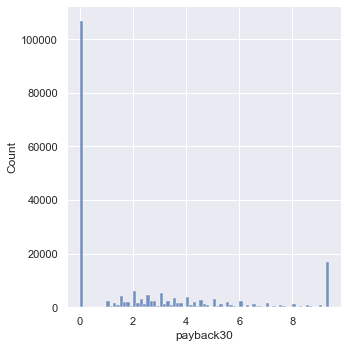

In [45]:
sns.displot(df["payback30"])

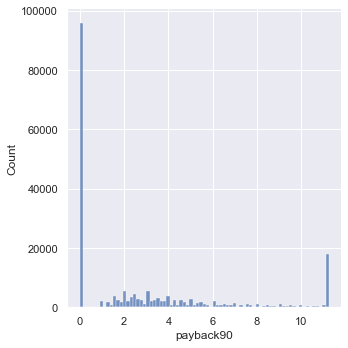

In [46]:
sns.displot(df["payback90"])

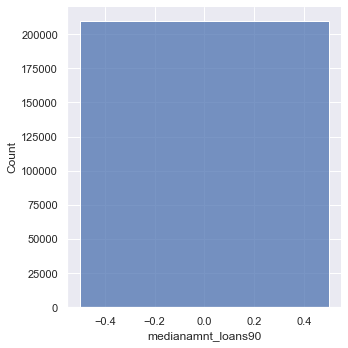

In [47]:
sns.displot(df["medianamnt_loans90"])

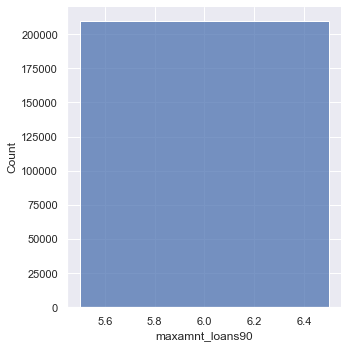

In [48]:
sns.displot(df["maxamnt_loans90"])

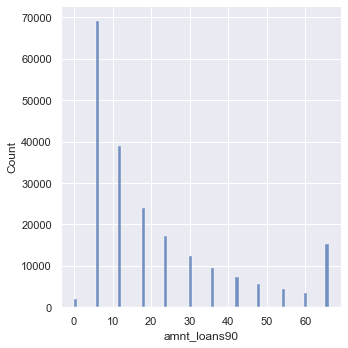

In [49]:
sns.displot(df["amnt_loans90"])

In [50]:
df.shape

(209593, 34)

In [51]:
import scipy.stats as stats
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df=df[(z<3).all(axis=1)]
df

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90


# Splitting the dataset into 2 variables namely 'X' and 'Y'

In [52]:
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [53]:
df=df.drop('pcircle',axis=1)
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [54]:
df=df.drop('pdate',axis=1)
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [55]:
df=df.drop('Unnamed: 0',axis=1)
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [56]:
df=df.drop('msisdn',axis=1)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [57]:
X=df.drop('last_rech_date_ma',axis=1)
Y=df['last_rech_date_ma']

In [58]:
Y.value_counts()

1.000000         47343
2.000000         26665
0.000000         20743
3.000000         19984
4.000000         15452
                 ...  
824616.273632        1
931546.437088        1
740555.920987        1
826835.412416        1
700461.145723        1
Name: last_rech_date_ma, Length: 1186, dtype: int64

In [59]:
X

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [60]:
Y

0          2.0
1         20.0
2          3.0
3         41.0
4          4.0
          ... 
209588     1.0
209589     4.0
209590     3.0
209591     2.0
209592    13.0
Name: last_rech_date_ma, Length: 209593, dtype: float64

# Label Binarization

In [61]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0)

In [62]:
Y

0         0
1         1
2         0
3         1
4         0
         ..
209588    0
209589    0
209590    0
209591    0
209592    1
Name: last_rech_date_ma, Length: 209593, dtype: int64

In [63]:
X

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-2.647896,-0.103577,-0.252299,-0.276346,-0.573844,-0.558583,-0.069550,-0.221637,-0.464760,-0.069279,...,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,2.904700,2.394093
1,0.377658,-0.097764,0.731037,0.553380,0.231788,0.036020,-0.069550,1.570178,-0.699718,-0.069670,...,-0.688582,-0.342470,-0.061871,-0.247794,-0.077941,-0.439950,2.517690,-0.229594,-0.385630,-0.419233
2,0.377658,-0.100102,-0.432011,-0.429033,-0.416020,-0.447674,-0.069550,-0.221637,-0.699718,-0.069670,...,-0.688582,-0.687700,-0.063284,-0.247794,-0.077941,-0.666624,-0.334212,-0.229594,-0.385630,-0.419233
3,0.377658,-0.103986,-0.581326,-0.555125,-0.587935,-0.576036,-0.069550,-0.471344,-0.934677,-0.069670,...,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,-0.385630,-0.419233
4,0.377658,-0.094660,-0.567293,-0.543274,-0.369886,-0.413227,-0.069550,0.103151,0.710030,-0.069633,...,1.660218,1.383682,-0.063284,-0.247794,-0.051250,0.693417,-0.334212,-0.229594,-0.120890,-0.192873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.377658,-0.101833,-0.567157,-0.543159,-0.372140,-0.414910,-0.069550,0.836664,-0.229802,-0.069633,...,-0.297116,-0.342470,-0.063284,-0.247794,-0.073493,-0.439950,-0.334212,-0.229594,-0.272170,-0.322221
209589,0.377658,-0.092969,-0.579622,-0.553686,-0.223791,-0.304144,-0.069550,-0.544737,0.005156,-0.069652,...,0.094351,0.002761,-0.063284,-0.247794,-0.069044,-0.213277,-0.334212,-0.229594,-0.272170,-0.322221
209590,0.377658,-0.093788,0.700790,0.533194,0.735567,0.937500,-0.069550,-0.221637,0.240114,-0.069521,...,0.485818,1.383682,-0.061871,-0.247794,-0.055699,1.146764,2.517690,-0.229594,0.068209,-0.047356
209591,0.377658,-0.084289,0.770755,0.594558,-0.529352,-0.433039,-0.068838,-0.544737,0.240114,-0.069596,...,-0.297116,0.002761,-0.061871,-0.247794,-0.069044,0.013396,2.517690,-0.229594,-0.385630,0.599385


# Train and Test of datasets

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

# Machine Learning Model for Classification and Evaluation

In [66]:
#Classification of model function
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)
#Training the model
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    acc_score=(accuracy_score(Y_test,pred))*100
    print("Accuracy Score:",acc_score)
    class_report=classification_report(Y_test,pred)
    print("\nClassification Report:\n",class_report)
    cv_score=(cross_val_score(model,X,Y,cv=5).mean())*100
    print("Cross Validation Score:",cv_score)
    result=acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is",result)

In [67]:
#Logistic Regression model
model=LogisticRegression()
classify(model,X,Y)

Accuracy Score: 77.51854767527851

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.96      0.86     30569
           1       0.71      0.29      0.41     11350

    accuracy                           0.78     41919
   macro avg       0.75      0.62      0.64     41919
weighted avg       0.76      0.78      0.74     41919

Cross Validation Score: 77.57606383947223

Accuracy Score - Cross Validation Score is -0.0575161641937143


In [68]:
#Random Forest Classifier
model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)

Accuracy Score: 83.13652520336841

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     30569
           1       0.78      0.52      0.63     11350

    accuracy                           0.83     41919
   macro avg       0.81      0.73      0.76     41919
weighted avg       0.83      0.83      0.82     41919

Cross Validation Score: 83.31623598931031

Accuracy Score - Cross Validation Score is -0.17971078594190715


In [69]:
#Decision Tree Classifier
model=DecisionTreeClassifier(random_state=21,max_depth=15)
classify(model,X,Y)

Accuracy Score: 80.28578926023998

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87     30569
           1       0.66      0.57      0.61     11350

    accuracy                           0.80     41919
   macro avg       0.75      0.73      0.74     41919
weighted avg       0.80      0.80      0.80     41919

Cross Validation Score: 80.72311541109511

Accuracy Score - Cross Validation Score is -0.43732615085512805


In [70]:
#Random Forest Classifier
model=RandomForestClassifier(max_depth=15,random_state=111)
classify(model,X,Y)

Accuracy Score: 83.13652520336841

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     30569
           1       0.78      0.52      0.63     11350

    accuracy                           0.83     41919
   macro avg       0.81      0.73      0.76     41919
weighted avg       0.83      0.83      0.82     41919

Cross Validation Score: 83.31623598931031

Accuracy Score - Cross Validation Score is -0.17971078594190715


In [71]:
#KNeighbors Classifier
model=KNeighborsClassifier(n_neighbors=15)
classify(model,X,Y)

Accuracy Score: 79.82060640759559

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     30569
           1       0.69      0.46      0.55     11350

    accuracy                           0.80     41919
   macro avg       0.76      0.69      0.71     41919
weighted avg       0.79      0.80      0.78     41919

Cross Validation Score: 79.75409535720752

Accuracy Score - Cross Validation Score is 0.06651105038807259


In [72]:
#Extra Tree Classifier
model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 82.43994370094705

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89     30569
           1       0.75      0.53      0.62     11350

    accuracy                           0.82     41919
   macro avg       0.80      0.73      0.75     41919
weighted avg       0.82      0.82      0.81     41919

Cross Validation Score: 82.49607603036672

Accuracy Score - Cross Validation Score is -0.05613232941966828


# Remove multicollinearity

In [73]:
df=pd.read_csv("Data file.csv")

In [74]:
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [75]:
df.shape

(209593, 37)

In [76]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [77]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [78]:
num=['int64','float64']
num_vars=list(df.select_dtypes(include=num))

In [79]:
num_vars

['Unnamed: 0',
 'label',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

In [80]:
df=df[num_vars]

In [81]:
df.shape

(209593, 34)

In [82]:
df.isna().sum()

Unnamed: 0              0
label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [83]:
df.dropna(inplace=True)

In [84]:
x=df.iloc[:,1:33]
y=df.iloc[:,-1]

In [85]:
x.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [88]:
corrmatrix=x_train.corr()

In [89]:
corrmatrix

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30
label,1.000000,-0.002747,0.169856,0.167753,0.057450,0.074917,0.002547,0.003178,0.132130,0.237375,...,-0.006478,0.196663,0.197623,0.001319,0.043510,0.004071,0.200268,0.084593,0.034451,0.052110
aon,-0.002747,1.000000,0.001220,0.000617,-0.000911,-0.000312,0.000621,-0.001905,0.006668,-0.002595,...,0.004795,-0.002171,-0.001601,-0.002185,0.004494,-0.000585,-0.002800,-0.000881,0.003552,0.004943
daily_decr30,0.169856,0.001220,1.000000,0.977544,0.438909,0.457201,0.001341,-0.000383,0.275979,0.453275,...,0.020267,0.369863,0.474333,-0.001439,-0.010412,0.011110,0.565754,0.402320,-0.036613,0.026885
daily_decr90,0.167753,0.000617,0.977544,1.000000,0.431699,0.470280,0.002359,-0.000462,0.264416,0.428689,...,0.015639,0.343765,0.450214,-0.001237,-0.004573,0.011935,0.569161,0.399005,-0.034027,0.019707
rental30,0.057450,-0.000911,0.438909,0.431699,1.000000,0.955450,-0.003174,0.000309,0.127413,0.232491,...,0.045080,0.179826,0.232014,-0.002603,-0.015920,0.003892,0.297802,0.229148,-0.035013,0.071699
rental90,0.074917,-0.000312,0.457201,0.470280,0.955450,1.000000,-0.002645,0.000510,0.121711,0.230527,...,0.035900,0.172266,0.231854,-0.003118,-0.009221,0.005124,0.327531,0.246204,-0.034035,0.066928
last_rech_date_ma,0.002547,0.000621,0.001341,0.002359,-0.003174,-0.002645,1.000000,0.001648,-0.000550,0.002233,...,-0.003277,-0.000977,-0.000450,0.003015,0.003489,0.001620,-0.000061,0.002043,0.004911,-0.003020
last_rech_date_da,0.003178,-0.001905,-0.000383,-0.000462,0.000309,0.000510,0.001648,1.000000,-0.000051,0.002826,...,-0.003301,0.001480,0.001249,0.002610,0.001856,0.000230,0.001695,0.002490,-0.001435,-0.003159
last_rech_amt_ma,0.132130,0.006668,0.275979,0.264416,0.127413,0.121711,-0.000550,-0.000051,1.000000,-0.003324,...,0.016111,-0.028112,0.007888,0.003386,0.030028,0.000659,0.013385,0.149004,0.022016,-0.028497
cnt_ma_rech30,0.237375,-0.002595,0.453275,0.428689,0.232491,0.230527,0.002233,0.002826,-0.003324,1.000000,...,0.007534,0.767072,0.752812,0.000117,-0.066453,0.015537,0.685617,0.173366,-0.070856,0.043529


<AxesSubplot:>

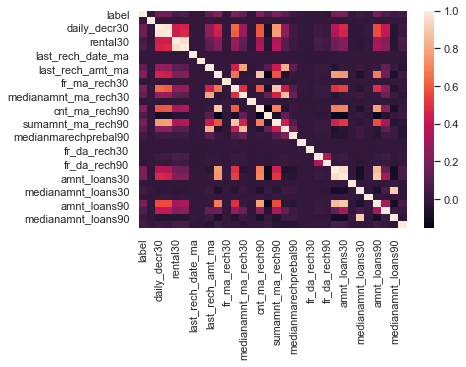

In [90]:
sns.heatmap(corrmatrix)

In [91]:
def correlation(df,threshold):
    correlated_cols=set()
    corr_matrix=df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                correlated_cols.add(colname)
    return correlated_cols

In [92]:
correlation(x_train, 0.7)

{'amnt_loans30',
 'amnt_loans90',
 'cnt_loans30',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech30',
 'medianamnt_ma_rech90',
 'rental90',
 'sumamnt_ma_rech90'}

In [93]:
corr_feature=correlation(x_train,0.6)

In [94]:
corr_feature

{'amnt_loans30',
 'amnt_loans90',
 'cnt_loans30',
 'cnt_ma_rech90',
 'daily_decr90',
 'medianamnt_loans90',
 'medianamnt_ma_rech30',
 'medianamnt_ma_rech90',
 'rental90',
 'sumamnt_ma_rech30',
 'sumamnt_ma_rech90'}

In [95]:
x_train.shape,x_test.shape

((146715, 32), (62878, 32))

In [96]:
x_train.drop(labels=corr_feature,axis=1,inplace=True)
x_test.drop(labels=corr_feature,axis=1,inplace=True)